In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5.QtGui import  *
from PyQt5.QAxContainer import *

class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        # Kiwoom Login
        self.kiwoom = QAxWidget("KHOPENAPI.KHOpenAPICtrl.1")
        self.kiwoom.dynamicCall("CommConnect()")

        # OpenAPI+ Event
        self.kiwoom.OnEventConnect.connect(self.event_connect)
        self.kiwoom.OnReceiveTrData.connect(self.receive_trdata)

        self.setWindowTitle("PyStock")
        self.setGeometry(300, 300, 300, 150)

        label = QLabel('종목코드: ', self)
        label.move(20, 20)

        self.code_edit = QLineEdit(self)
        self.code_edit.move(80, 20)
        self.code_edit.setText("039490")

        btn1 = QPushButton("조회", self)
        btn1.move(190, 20)
        btn1.clicked.connect(self.btn1_clicked)

        self.text_edit = QTextEdit(self)
        self.text_edit.setGeometry(10, 60, 280, 80)
        self.text_edit.setEnabled(False)

    def event_connect(self, err_code):
        if err_code == 0:
            self.text_edit.append("로그인 성공")

    def btn1_clicked(self):
        code = self.code_edit.text()
        self.text_edit.append("종목코드: " + code)

        # SetInputValue
        self.kiwoom.dynamicCall("SetInputValue(QString, QString)", "종목코드", code)

        # CommRqData
        self.kiwoom.dynamicCall("CommRqData(QString, QString, int, QString)", "opt10001_req", "opt10001", 0, "0101")

    def receive_trdata(self, screen_no, rqname, trcode, recordname, prev_next, data_len, err_code, msg1, msg2):
        if rqname == "opt10001_req":
            name = self.kiwoom.dynamicCall("CommGetData(QString, QString, QString, int, QString)", trcode, "", rqname, 0, "종목명")
            volume = self.kiwoom.dynamicCall("CommGetData(QString, QString, QString, int, QString)", trcode, "", rqname, 0, "거래량")

            self.text_edit.append("종목명: " + name.strip())
            self.text_edit.append("거래량: " + volume.strip())

if __name__ == "__main__":
    app = QApplication(sys.argv)
    myWindow = MyWindow()
    myWindow.show()
    app.exec_()

In [2]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2016, 3, 4)
gs = web.DataReader("078930.KS", "yahoo", start, end)

In [5]:
gs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,58300.0,56000.0,58200.0,56400.0,247497.0,56400.0
2014-01-03,56700.0,55100.0,56500.0,55700.0,220482.0,55700.0
2014-01-06,55800.0,54600.0,55400.0,55500.0,190935.0,55500.0
2014-01-07,55600.0,54900.0,55000.0,55100.0,179610.0,55100.0
2014-01-08,55400.0,53700.0,55300.0,54300.0,374566.0,54300.0
2014-01-09,54400.0,53600.0,54200.0,54000.0,264952.0,54000.0
2014-01-10,54500.0,53000.0,54000.0,53300.0,652681.0,53300.0
2014-01-13,53800.0,53200.0,53300.0,53400.0,165177.0,53400.0
2014-01-14,53400.0,52500.0,53000.0,53000.0,186179.0,53000.0


In [5]:
import datetime
import matplotlib.pyplot as plt

In [9]:
gs.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-26,54500.0,53200.0,54300.0,53300.0,159453.0,50240.070312
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,49957.296875
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,51936.734375
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,51842.476562
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,51088.402344


In [10]:
ma5 = gs['Adj Close'].rolling(window = 5).mean()

In [13]:
ma5.tail(10)

Date
2016-02-19    47610.245313
2016-02-22    47695.078906
2016-02-23    48128.670312
2016-02-24    48675.372656
2016-02-25    49240.926562
2016-02-26    49749.925000
2016-02-29    50240.071875
2016-03-02    50673.663281
2016-03-03    50956.440625
2016-03-04    51012.996094
Name: Adj Close, dtype: float64

In [14]:
gs['Volume'] != 0

Date
2014-01-02    True
2014-01-03    True
2014-01-06    True
2014-01-07    True
2014-01-08    True
2014-01-09    True
2014-01-10    True
2014-01-13    True
2014-01-14    True
2014-01-15    True
2014-01-16    True
2014-01-17    True
2014-01-20    True
2014-01-21    True
2014-01-22    True
2014-01-23    True
2014-01-24    True
2014-01-27    True
2014-01-28    True
2014-01-29    True
2014-02-03    True
2014-02-04    True
2014-02-05    True
2014-02-06    True
2014-02-07    True
2014-02-10    True
2014-02-11    True
2014-02-12    True
2014-02-13    True
2014-02-14    True
              ... 
2016-01-19    True
2016-01-20    True
2016-01-21    True
2016-01-22    True
2016-01-25    True
2016-01-26    True
2016-01-27    True
2016-01-28    True
2016-01-29    True
2016-02-01    True
2016-02-02    True
2016-02-03    True
2016-02-04    True
2016-02-05    True
2016-02-11    True
2016-02-12    True
2016-02-15    True
2016-02-16    True
2016-02-17    True
2016-02-18    True
2016-02-19    True
2016-02

In [15]:
new_gs = gs[gs['Volume'] != 0]

In [16]:
ma5  = new_gs['Adj Close'].rolling(window=5).mean()

In [17]:
new_gs.insert(len(new_gs.columns), "MA5", ma5)

In [21]:
ma20 = new_gs['Adj Close'].rolling(window=20).mean() 
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()

In [22]:
new_gs

,High,Low,Open,Close,Volume,Adj Close,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2014-01-02,58300.0,56000.0,58200.0,56400.0,247497.0,50113.585938,NaN,NaN,NaN,NaN
2014-01-03,56700.0,55100.0,56500.0,55700.0,220482.0,49491.609375,NaN,NaN,NaN,NaN
2014-01-06,55800.0,54600.0,55400.0,55500.0,190935.0,49313.898438,NaN,NaN,NaN,NaN
2014-01-07,55600.0,54900.0,55000.0,55100.0,179610.0,48958.484375,NaN,NaN,NaN,NaN
2014-01-08,55400.0,53700.0,55300.0,54300.0,374566.0,48247.656250,49225.046875,NaN,NaN,NaN
2014-01-09,54400.0,53600.0,54200.0,54000.0,264952.0,47981.093750,48798.548438,NaN,NaN,NaN
2014-01-10,54500.0,53000.0,54000.0,53300.0,652681.0,47359.113281,48372.049219,NaN,NaN,NaN
2014-01-13,53800.0,53200.0,53300.0,53400.0,165177.0,47447.964844,47998.862500,NaN,NaN,NaN
2014-01-14,53400.0,52500.0,53000.0,53000.0,186179.0,47092.554688,47625.676562,NaN,NaN,NaN


In [23]:
%matplotlib
plt.plot(new_gs.index, new_gs['MA5'], label = 'MA5')
plt.plot(new_gs.index, new_gs['MA20'], label = 'MA20')
plt.plot(new_gs.index, new_gs['MA60'], label = 'MA60')
plt.plot(new_gs.index, new_gs['MA120'], label = 'MA120')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Using matplotlib backend: Qt5Agg


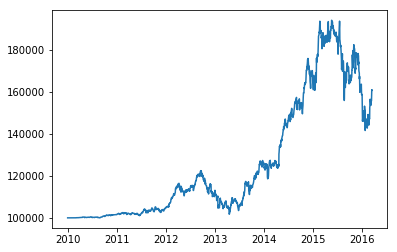

In [3]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order, symbol
from zipline.algorithm import TradingAlgorithm

# data
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 3, 19)
data = web.DataReader("AAPL", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC')

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 1)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

plt.plot(result.index, result.portfolio_value)
plt.show()

In [4]:
data = web.DataReader("AAPL", "yahoo", start, end)

In [5]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 3, 29)
data = web.DataReader("AAPL", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC')

def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')
    context.hold = False

def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    buy = False
    sell = False

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20 and context.hold == False:
        order_target(context.sym, 100)
        context.hold = True
        buy = True
    elif ma5 < ma20 and context.hold == True:
        order_target(context.sym, -100)
        context.hold = False
        sell = True

    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20, buy=buy, sell=sell)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

C:\Anaconda3\envs\py34_32\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Anaconda3\envs\py34_32\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [6]:
result

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,buy,capital_used,ending_cash,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2009-12-31 21:00:00+00:00,NaN,NaN,0.000000,NaN,0.005003,NaN,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,1,[],0.0
2010-01-04 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.010031,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,2,[],0.0
2010-01-05 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.015084,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,3,[],0.0
2010-01-06 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.020162,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,4,[],0.0
2010-01-07 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.025266,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,5,[],0.0
2010-01-08 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.030395,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,6,[],0.0
2010-01-11 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.035550,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,7,[],0.0
2010-01-12 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.040730,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,8,[],0.0
2010-01-13 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.045937,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,9,[],0.0
2010-01-14 21:00:00+00:00,NaN,0.000000,0.000000,NaN,0.051169,0.000000,NaN,NaN,0.000000,100000.000000,...,0.000000,0.000000,0,NaN,100000.000000,0.000000,0.000000,10,[],0.0


In [ ]:
plt.plot(result.index, result.portfolio_value)
plt.show()

In [4]:
%matplotlib
plt.plot(result.index, result.ma5)
plt.plot(result.index, result.ma20)
plt.legend(loc='best')
plt.plot(result.ix[result.buy == True].index, result.ma5[result.buy == True], '^')
plt.plot(result.ix[result.sell == True].index, result.ma5[result.sell == True], 'v')
plt.show()

Using matplotlib backend: Qt5Agg


In [7]:
import pandas_datareader.data as web
import datetime
from zipline.api import order, record, symbol
from zipline.algorithm import TradingAlgorithm
from zipline.api import set_commission, commission
import matplotlib.pyplot as plt

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

def initialize(context):
    context.i = 0
    context.sym = symbol('GS')
    set_commission(commission.PerDollar(cost=0.00165))
    

def handle_data(context, data):
    #order_target(context.sym, 1)
    order(context.sym, 1)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

print(result[['starting_cash', 'ending_cash', 'ending_value']])

                           starting_cash    ending_cash   ending_value
2016-01-04 21:00:00+00:00  100000.000000  100000.000000       0.000000
2016-01-05 21:00:00+00:00  100000.000000   53146.955298   46752.488281
2016-01-06 21:00:00+00:00   53146.955298    8183.148890   89734.609375
2016-01-07 21:00:00+00:00    8183.148890  -36166.656149  132763.863281
2016-01-08 21:00:00+00:00  -36166.656149  -82830.775847  186255.875000
2016-01-11 21:00:00+00:00  -82830.775847 -128455.817811  227635.605469
2016-01-12 21:00:00+00:00 -128455.817811 -175025.476965  278818.265625
2016-01-13 21:00:00+00:00 -175025.476965 -221736.830850  326277.710938
2016-01-14 21:00:00+00:00 -221736.830850 -267975.874183  369118.437500
2016-01-15 21:00:00+00:00 -267975.874183 -313317.530598  407199.093750
2016-01-19 21:00:00+00:00 -313317.530598 -358139.646190  447259.179688
2016-01-20 21:00:00+00:00 -358139.646190 -402725.606505  489392.964844
2016-01-21 21:00:00+00:00 -402725.606505 -447925.568189  541235.437500
2016-0

In [12]:
zipline run --help

SyntaxError: invalid syntax (<ipython-input-12-c110bcdf3982>, line 1)

In [ ]:
import pandas_datareader.data as web
import datetime
from zipline.api import order, record, symbol
from zipline.algorithm import TradingAlgorithm
from zipline.api import set_commission, commission
import matplotlib.pyplot as plt

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

def initialize(context):
    context.i = 0
    context.sym = symbol('GS')
    set_commission(commission.PerDollar(cost=0.00165))

def handle_data(context, data):
    #order_target(context.sym, 1)
    order(context.sym, 1)

algo = TradingAlgorithm(capital_base=100000000, initialize=initialize, handle_data=handle_data)
result = algo.run(data)

print(result[['starting_cash', 'ending_cash', 'ending_value']])

In [5]:
import pandas_datareader.data as web
import datetime
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm
import matplotlib.pyplot as plt

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

def initialize(context):
    context.i = 0
    context.sym = symbol('GS')

def handle_data(context, data):
    order_target(context.sym, 1)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

print(result[['starting_cash', 'ending_cash', 'ending_value']])

                           starting_cash  ending_cash  ending_value
2016-01-04 21:00:00+00:00     100000.000   100000.000           0.0
2016-01-05 21:00:00+00:00     100000.000    50375.199       49600.0
2016-01-06 21:00:00+00:00      50375.199    50375.199       47600.0
2016-01-07 21:00:00+00:00      50375.199    50375.199       46950.0
2016-01-08 21:00:00+00:00      50375.199    50375.199       49400.0
2016-01-11 21:00:00+00:00      50375.199    50375.199       48300.0
2016-01-12 21:00:00+00:00      50375.199    50375.199       49300.0
2016-01-13 21:00:00+00:00      50375.199    50375.199       49450.0
2016-01-14 21:00:00+00:00      50375.199    50375.199       48950.0
2016-01-15 21:00:00+00:00      50375.199    50375.199       48000.0
2016-01-19 21:00:00+00:00      50375.199    50375.199       47450.0
2016-01-20 21:00:00+00:00      50375.199    50375.199       47200.0
2016-01-21 21:00:00+00:00      50375.199    50375.199       47850.0
2016-01-22 21:00:00+00:00      50375.199    5037

In [ ]:
ma5.tail()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.show()